In [1]:
import rosbag

import scipy.io as sio

bag_file = "datas/2023-07-13-14-19-21.bag"

## 1. Read data from bagfile

In [2]:
bag = rosbag.Bag(bag_file)
bno055_imu_raw = []
xsense_imu_raw = []

for topic, msg, t in bag.read_messages():
    if topic == "/bno055_imu/raw":
        bno055_imu_raw.append(msg)
    elif topic == "/imu/data":
        xsense_imu_raw.append(msg)

print(len(bno055_imu_raw), len(xsense_imu_raw))

7371 14747


In [35]:
bno055_imu_raw[0].header.stamp.secs

1689229161

In [65]:
xsense = []
bno055 = []
x = []
j = 0
for i in range(len(bno055_imu_raw)):
    x.append(i)
    bno055.append([i, 
                   bno055_imu_raw[i].angular_velocity.x, bno055_imu_raw[i].angular_velocity.y, bno055_imu_raw[i].angular_velocity.z])
    xsense.append([i, 
                   xsense_imu_raw[j].angular_velocity.x, xsense_imu_raw[j].angular_velocity.y, xsense_imu_raw[j].angular_velocity.z])
    j += 2

### 1.1 X angular velocity

In [45]:
import matplotlib.pyplot as plt

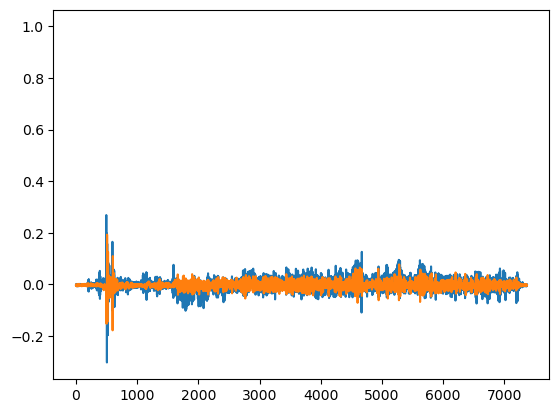

In [66]:
y1 = []
y2 = []
for i in range(len(bno055)):
    y1.append(float(xsense[i][1]))
    y2.append(float(bno055[i][1]))

plt.plot(x, y1, 1, 'red')
plt.plot(x, y2, 1, 'blue')
plt.show()

In [98]:
timestamp = imu_raw[0].header.stamp.secs + imu_raw[0].header.stamp.nsecs * 1E-9
print("{:.{}f}".format(timestamp, 9))

1689130376.541603088


## 2. Parsing data

In [100]:
temp1 = []
temp2 = []
temp3 = []
temp4 = []
temp5 = []
temp6 = []
temp7 = []

for i in range(len(imu_raw)):
    temp1.append(imu_raw[i].header.stamp.secs + imu_raw[i].header.stamp.nsecs * 1e-9)
    temp2.append(imu_raw[i].angular_velocity.x)
    temp3.append(imu_raw[i].angular_velocity.y)
    temp4.append(imu_raw[i].angular_velocity.z)
    temp5.append(imu_raw[i].linear_acceleration.x)
    temp6.append(imu_raw[i].linear_acceleration.y)
    temp7.append(imu_raw[i].linear_acceleration.z)

bno055_imu_data = {"Timestamp": temp1, "AngularVelocityX": temp2, "AngularVelocityY": temp3, "AngularVelocityZ": temp4,
                   "LinearAccelerationX": temp5, "LinearAccelerationY": temp6, "LinearAccelerationZ": temp7}

temp1 = []
temp2 = []
temp3 = []
temp4 = []
temp5 = []

for i in range(len(gps_raw)):
    temp1.append(gps_raw[i].header.stamp.secs + gps_raw[i].header.stamp.nsecs * 1e-9)
    temp2.append(gps_raw[i].latitude)
    temp3.append(gps_raw[i].longitude)
    temp4.append(gps_raw[i].altitude)
    temp5.append(gps_raw[i].position_covariance_type)

gps_data = {"Timestamp": temp1, "Latitude": temp2, "Longitude": temp3, "Altitude": temp4, "PositionCovarianceType": temp5}


## 3. Save as matfile

In [101]:
bno055_savepath = "/home/crange/dev/python/output/bno055.mat"
gps_savepath = "/home/crange/dev/python/output/gps.mat"

sio.savemat(bno055_savepath, bno055_imu_data)
sio.savemat(gps_savepath, gps_data)

## 4. Load matfile

In [102]:
load_imu = sio.loadmat(bno055_savepath)
load_gps = sio.loadmat(gps_savepath)

In [103]:
print("{:.{}f}".format(load_gps["Timestamp"][0][0], 9))

1689130377.210824013


In [104]:
load_imu["AngularVelocityX"]

array([[-0.00222222, -0.00333333, -0.00333333, ..., -0.00444444,
        -0.00333333, -0.00222222]])